In [ ]:
import numpy as np 
import pandas as pd 


In [ ]:
pd.options.display.max_colwidth = 150

In [ ]:
# graphics imports
import plotly
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS

# Natural language tool kits
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# download stopwords
nltk.download('stopwords')

# string operations
import string 
import re

# general imports
import math

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('IMDB Dataset.csv')
df.head()

Saving IMDB Dataset.csv to IMDB Dataset.csv


,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened ...",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometim...",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted ...",positive
3,Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />Thi...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. Thi...",positive


In [ ]:
lens = df['review'].str.len()

fig = go.Figure()
fig.add_trace(
    go.Histogram(x=lens, xbins=dict(size=200))
    )
fig.update_layout(title='Length of reviews', 
                    xaxis_title="Length",
                    yaxis_title="# of reviews")
plotly.offline.iplot(fig)

In [ ]:
poslens = df[df['sentiment']=='positive']['review'].str.len()
neglens = df[df['sentiment']=='negative']['review'].str.len()
fig = go.Figure()
fig.add_trace(
    go.Histogram(x=poslens, xbins=dict(size=200), name='positive'),
    )
fig.add_trace(
    go.Histogram(x=neglens, xbins=dict(size=200), name='negative'),
    )
fig.update_layout(title='Length of reviews', 
                    xaxis_title="Length",
                    yaxis_title="# of reviews",)
plotly.offline.iplot(fig)

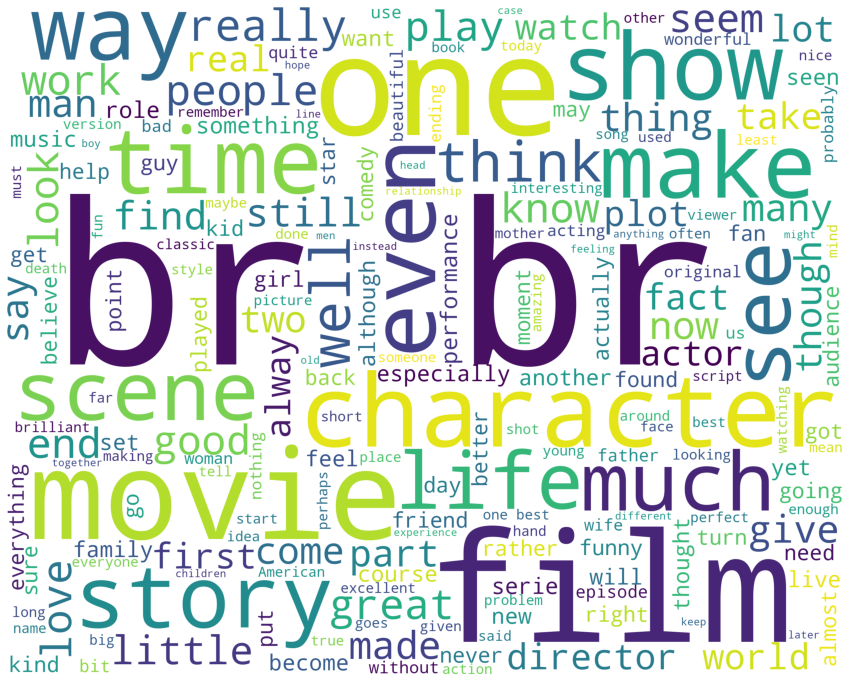

In [ ]:
df_pos = df[df['sentiment']=='positive']['review']

wordcloud1 = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=2500,
                      height=2000
                      ).generate(" ".join(df_pos))

plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

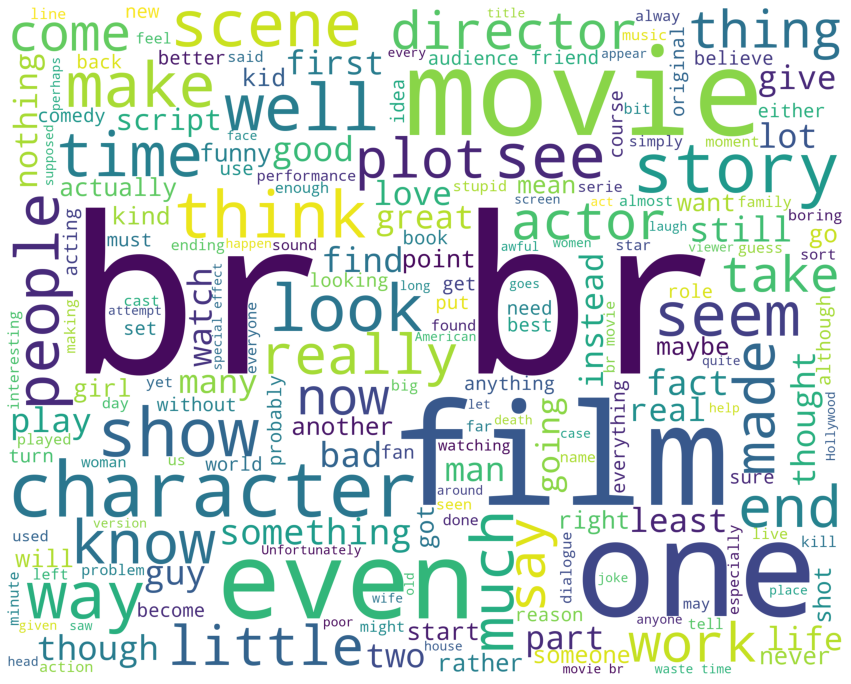

In [ ]:
df_neg = df[df['sentiment']=='negative']['review']

wordcloud1 = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=2500,
                      height=2000
                      ).generate(" ".join(df_neg))

plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

In [ ]:
# the text mode is enough...
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [ ]:
# show the reviews again... 
df[['review']].head(20)

,review
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened ..."
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometim..."
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted ..."
3,Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />Thi...
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. Thi..."
5,"Probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble cause, but it's not preachy or boring. It just n..."
6,I sure would like to see a resurrection of a up dated Seahunt series with the tech they have today it would bring back the kid excitement in me.I ...
7,"This show was an amazing, fresh & innovative idea in the 70's when it first aired. The first 7 or 8 years were brilliant, but things dropped off a..."
8,Encouraged by the positive comments about this film on here I was looking forward to watching this film. Bad mistake. I've seen 950+ films and thi...
9,"If you like original gut wrenching laughter you will like this movie. If you are young or old then you will love this movie, hell even my mom like..."


In [ ]:
df['review_lw'] = df['review'].str.lower()
df[['review','review_lw']].head(10)

,review,review_lw
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened ...","one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened ..."
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometim...","a wonderful little production. <br /><br />the filming technique is very unassuming- very old-time-bbc fashion and gives a comforting, and sometim..."
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted ...","i thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted ..."
3,Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />Thi...,basically there's a family where a little boy (jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />thi...
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. Thi...","petter mattei's ""love in the time of money"" is a visually stunning film to watch. mr. mattei offers us a vivid portrait about human relations. thi..."
5,"Probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble cause, but it's not preachy or boring. It just n...","probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble cause, but it's not preachy or boring. it just n..."
6,I sure would like to see a resurrection of a up dated Seahunt series with the tech they have today it would bring back the kid excitement in me.I ...,i sure would like to see a resurrection of a up dated seahunt series with the tech they have today it would bring back the kid excitement in me.i ...
7,"This show was an amazing, fresh & innovative idea in the 70's when it first aired. The first 7 or 8 years were brilliant, but things dropped off a...","this show was an amazing, fresh & innovative idea in the 70's when it first aired. the first 7 or 8 years were brilliant, but things dropped off a..."
8,Encouraged by the positive comments about this film on here I was looking forward to watching this film. Bad mistake. I've seen 950+ films and thi...,encouraged by the positive comments about this film on here i was looking forward to watching this film. bad mistake. i've seen 950+ films and thi...
9,"If you like original gut wrenching laughter you will like this movie. If you are young or old then you will love this movie, hell even my mom like...","if you like original gut wrenching laughter you will like this movie. if you are young or old then you will love this movie, hell even my mom like..."


In [ ]:
sw = stopwords.words('english')

print(f'Stopwords sample: {sw[0:10]}')
print(f'Number of stopwords: {len(sw)}')

Stopwords sample: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
Number of stopwords: 179


In [ ]:
print(f'Punctuation {string.punctuation}')

Punctuation !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
def transform_text(s):
    
    # remove html
    html=re.compile(r'<.*?>')
    s = html.sub(r'',s)
    
    # remove numbers
    s = re.sub(r'\d+', '', s)
    
    # remove punctuation
    # remove stopwords
    tokens = nltk.word_tokenize(s)
    
    new_string = []
    for w in tokens:
        # remove words with len = 2 AND stopwords
        if len(w) > 2 and w not in sw:
            new_string.append(w)
    
    
    
    s = ' '.join(new_string)
    s = s.strip()

    exclude = set(string.punctuation)
    s = ''.join(ch for ch in s if ch not in exclude)
    
    return s.strip()

In [ ]:
nltk.download('punkt')
import nltk
transform_text('there is a tree near <br/> the river 123! see')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


'tree near river see'

In [ ]:
df['review_sw'] = df['review_lw'].apply(transform_text)
df[['review','review_lw', 'review_sw']].head(20)

,review,review_lw,review_sw
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened ...","one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened ...",one reviewers mentioned watching episode ll hooked right exactly happened methe first thing struck brutality unflinching scenes violence set right...
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometim...","a wonderful little production. <br /><br />the filming technique is very unassuming- very old-time-bbc fashion and gives a comforting, and sometim...",wonderful little production filming technique unassuming oldtimebbc fashion gives comforting sometimes discomforting sense realism entire piece ac...
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted ...","i thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted ...",thought wonderful way spend time hot summer weekend sitting air conditioned theater watching lighthearted comedy plot simplistic dialogue witty ch...
3,Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />Thi...,basically there's a family where a little boy (jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />thi...,basically family little boy jake thinks zombie closet parents fighting timethis movie slower soap opera suddenly jake decides become rambo kill z...
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. Thi...","petter mattei's ""love in the time of money"" is a visually stunning film to watch. mr. mattei offers us a vivid portrait about human relations. thi...",petter mattei love time money visually stunning film watch mr mattei offers vivid portrait human relations movie seems telling money power success...
5,"Probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble cause, but it's not preachy or boring. It just n...","probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble cause, but it's not preachy or boring. it just n...",probably alltime favorite movie story selflessness sacrifice dedication noble cause preachy boring never gets old despite seen times last years pa...
6,I sure would like to see a resurrection of a up dated Seahunt series with the tech they have today it would bring back the kid excitement in me.I ...,i sure would like to see a resurrection of a up dated seahunt series with the tech they have today it would bring back the kid excitement in me.i ...,sure would like see resurrection dated seahunt series tech today would bring back kid excitement mei grew black white seahunt gunsmoke hero every ...
7,"This show was an amazing, fresh & innovative idea in the 70's when it first aired. The first 7 or 8 years were brilliant, but things dropped off a...","this show was an amazing, fresh & innovative idea in the 70's when it first aired. the first 7 or 8 years were brilliant, but things dropped off a...",show amazing fresh innovative idea first aired first years brilliant things dropped show really funny anymore continued decline complete waste tim...
8,Encouraged by the positive comments about this film on here I was looking forward to watching this film. Bad mistake. I've seen 950+ films and thi...,encouraged by the positive comments about this film on here i was looking forward to watching this film. bad mistake. i've seen 950+ films and thi...,encouraged positive comment

In [ ]:
import nltk
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer() 

print(lemmatizer.lemmatize("rocks", pos="v"))
print(lemmatizer.lemmatize("gone", pos="v"))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
rock
go


In [ ]:
def lemmatizer_text(s):
    tokens = nltk.word_tokenize(s)
    
    new_string = []
    for w in tokens:
        lem = lemmatizer.lemmatize(w, pos="v")
        # exclude if lenght of lemma is smaller than 2
        if len(lem) > 2:
            new_string.append(lem)
    
    s = ' '.join(new_string)
    return s.strip()

In [ ]:
df['review_lm'] = df['review_sw'].apply(lemmatizer_text)
df[['review','review_lw', 'review_sw', 'review_lm']].head(20)

,review,review_lw,review_sw,review_lm
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened ...","one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened ...",one reviewers mentioned watching episode ll hooked right exactly happened methe first thing struck brutality unflinching scenes violence set right...,one reviewers mention watch episode hook right exactly happen methe first thing strike brutality unflinching scenes violence set right word trust ...
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometim...","a wonderful little production. <br /><br />the filming technique is very unassuming- very old-time-bbc fashion and gives a comforting, and sometim...",wonderful little production filming technique unassuming oldtimebbc fashion gives comforting sometimes discomforting sense realism entire piece ac...,wonderful little production film technique unassuming oldtimebbc fashion give comfort sometimes discomforting sense realism entire piece actors ex...
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted ...","i thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted ...",thought wonderful way spend time hot summer weekend sitting air conditioned theater watching lighthearted comedy plot simplistic dialogue witty ch...,think wonderful way spend time hot summer weekend sit air condition theater watch lighthearted comedy plot simplistic dialogue witty character lik...
3,Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />Thi...,basically there's a family where a little boy (jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />thi...,basically family little boy jake thinks zombie closet parents fighting timethis movie slower soap opera suddenly jake decides become rambo kill z...,basically family little boy jake think zombie closet parent fight timethis movie slower soap opera suddenly jake decide become rambo kill zombieok...
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. Thi...","petter mattei's ""love in the time of money"" is a visually stunning film to watch. mr. mattei offers us a vivid portrait about human relations. thi...",petter mattei love time money visually stunning film watch mr mattei offers vivid portrait human relations movie seems telling money power success...,petter mattei love time money visually stun film watch mattei offer vivid portrait human relations movie seem tell money power success people diff...
5,"Probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble cause, but it's not preachy or boring. It just n...","probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble cause, but it's not preachy or boring. it just n...",probably alltime favorite movie story selflessness sacrifice dedication noble cause preachy boring never gets old despite seen times last years pa...,probably alltime favorite movie story selflessness sacrifice dedication noble cause preachy bore never get old despite see time last years paul lu...
6,I sure would like to see a resurrection of a up dated Seahunt series with the tech they have today it would bring back the kid excitement in me.I ...,i sure would like to see a resurrection of a up dated seahunt series with the tech they have today it would bring back the kid excitement in me.i ...,sure would like see resur

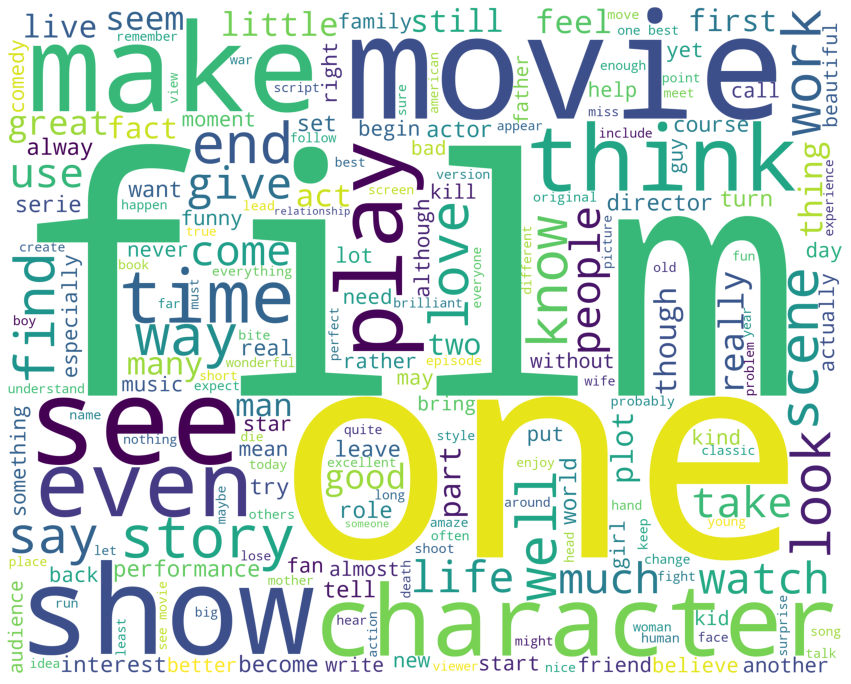

In [ ]:
df_pos = df[df['sentiment']=='positive']['review_lm']

wordcloud1 = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=2500,
                      height=2000
                      ).generate(" ".join(df_pos))

plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

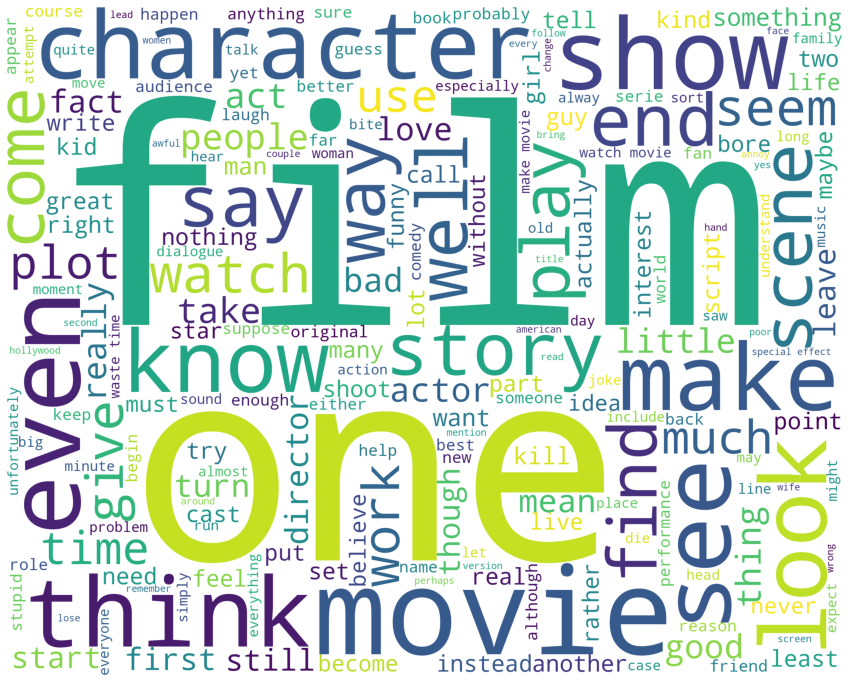

In [ ]:
df_neg = df[df['sentiment']=='negative']['review_lm']

wordcloud1 = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=2500,
                      height=2000
                      ).generate(" ".join(df_neg))

plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

In [ ]:
pos_train = df[df['sentiment']=='positive'][['review_lm', 'sentiment']].head(17500)
neg_train = df[df['sentiment']=='negative'][['review_lm', 'sentiment']].head(17500)


# Test dataset (last 7.500 rows)
pos_test = df[df['sentiment']=='positive'][['review_lm', 'sentiment']].tail(7500)
neg_test = df[df['sentiment']=='negative'][['review_lm', 'sentiment']].tail(7500)

# put all toghether again...
train_df = pd.concat([pos_train, neg_train]).sample(frac = 1).reset_index(drop=True)
test_df = pd.concat([pos_test, neg_test]).sample(frac = 1).reset_index(drop=True)

In [ ]:
train_df.head()

,review_lm,sentiment
0,fall ones fall waste life wol category sad two hours older entertain family members also watch movie throw demean comment screen root mummy felt s...,negative
1,hard decide say one totally one hundred percent bad although movieinamovie unspeakably bad mean campy miss mile pretty sure intentional however da...,negative
2,fabulous film rent dvd recently floor stun piece work douglas sirk filmmaking genius get performances rock hudson dorothy malone oscar winner robe...,positive
3,like movie cute funnyi find film good family filmthe dirtiest part movie make reference new york yankees red sox nation understand yankees dirty w...,positive
4,want like film yes saw blah blah blah ripoff like film well ingredients good brilliant good film unfortunately ingredients act terrible first see ...,negative


In [ ]:
test_df.head()

,review_lm,sentiment
0,loosely base ideas original hit set modern day see base afghanistan get destroy uav right startand exactly movie jump shark uav arm could think ev...,negative
1,life see many great awful movies expert professional review definitely something say one firstly actors worst see act unreal even want throw away ...,negative
2,remake anime classic one even better sylia nene linna priss back knight saber hardsuits battle robotic boomers animation crisp character welldevel...,positive
3,much love train could stomach movie premise one could steal locomotive drive arkansas chicago without hit another train along way right impossible...,negative
4,group bandits rob train gold shipment carry escape bandits split one thief know gold hide kill able talk three men different part clue lead gold b...,positive


In [ ]:
def get_word_counts(words):
    word_counts = {}
    for word in words:
        word_counts[word] = word_counts.get(word, 0.0) + 1.0
    return word_counts

def fit(df_fit):
    num_messages = {}
    log_class_priors = {}
    word_counts = {}
    vocab = set()
 
    n = df_fit.shape[0]
    num_messages['positive'] = df_fit[df_fit['sentiment']=='positive'].shape[0]
    num_messages['negative'] = df_fit[df_fit['sentiment']=='negative'].shape[0]
    log_class_priors['positive'] = math.log(num_messages['positive'] / n)
    log_class_priors['negative'] = math.log(num_messages['negative'] / n)
    word_counts['positive'] = {}
    word_counts['negative'] = {}
 
    for x, y in zip(df_fit['review_lm'], df_fit['sentiment']):
        
        counts = get_word_counts(nltk.word_tokenize(x))
        for word, count in counts.items():
            if word not in vocab:
                vocab.add(word)
            if word not in word_counts[y]:
                word_counts[y][word] = 0.0
 
            word_counts[y][word] += count
    
    return word_counts, log_class_priors, vocab, num_messages

In [ ]:
word_counts, log_class_priors, vocab, num_messages = fit(train_df)

In [ ]:
word_count_df = pd.DataFrame(word_counts).fillna(0).sort_values(by='positive', ascending=False).reset_index()
word_count_df

,index,positive,negative
0,film,34640.0,30235.0
1,movie,25792.0,33910.0
2,one,18422.0,17424.0
3,see,14993.0,13607.0
4,make,14203.0,16773.0
...,...,...,...
134310,seventeenthcentury,0.0,1.0
134311,knowledgewhere,0.0,1.0
134312,bassiano,0.0,1.0
134313,poutingin,0.0,1.0


In [ ]:
# Let's see how some words are distributed
word_count_sample_df = word_count_df.head(5000)
fig = go.Figure(go.Scatter(
    x = word_count_sample_df['positive'],
    y = word_count_sample_df['negative'],
    text = word_count_sample_df['index'],
    mode='markers'
))
fig.update_layout(title='Word distribution sample', 
                xaxis_title="Positive word count",
                yaxis_title="Negative word count",)

plotly.offline.iplot(fig)

In [ ]:
 def predict(df_predict, vocab, word_counts, num_messages, log_class_priors):
    result = []
    for x in df_predict:
        counts = get_word_counts(nltk.word_tokenize(x))
        positive_score = 0
        negative_score = 0
        for word, _ in counts.items():
            if word not in vocab: continue
            
            # add Laplace smoothing
            log_w_given_positive = math.log((word_counts['positive'].get(word, 0.0) + 1) / (num_messages['positive'] + len(vocab)) )
            log_w_given_negative= math.log((word_counts['negative'].get(word, 0.0) + 1) / (num_messages['negative'] + len(vocab)) )
 
            positive_score += log_w_given_positive
            negative_score += log_w_given_negative
 
        positive_score += log_class_priors['positive']
        negative_score += log_class_priors['negative']
 
        if positive_score > negative_score:
            result.append('positive')
        else:
            result.append('negative')
    return result

In [ ]:
result = predict(test_df['review_lm'], vocab, word_counts, num_messages, log_class_priors)
result[0:10] 

['negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative']

In [ ]:
y_true = test_df['sentiment'].tolist()

acc = sum(1 for i in range(len(y_true)) if result[i] == y_true[i]) / float(len(y_true))
print("{0:.4f}".format(acc))

0.8557


Confusion matrix

In [ ]:
y_actu = pd.Series(y_true, name='Real')
y_pred = pd.Series(result, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion = df_confusion / df_confusion.sum(axis=1) * 100
df_confusion.round(2)

Predicted,negative,positive
Real,,
negative,82.31,17.69
positive,11.17,88.83


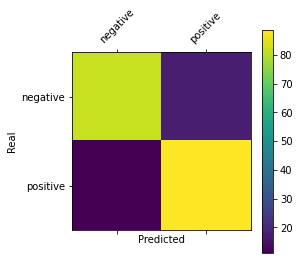

In [ ]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix'):
    plt.matshow(df_confusion) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)    

plot_confusion_matrix(df_confusion)